``` Fast F1 and Formula 1 Plotting Basics```

In [96]:
# Setup
import fastf1
from fastf1 import plotting
from fastf1 import utils

from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

import numpy as np
import pandas as pd

In [97]:
# Enable Caching
fastf1.Cache.enable_cache('../cache')

In [98]:
# Select Drivers and Session
driver_1, driver_2 = 'VER', 'LEC'
year, grand_prix, session = 2022, 'Bahrain', 'Q'

In [99]:
plotting.setup_mpl()

selected_session = fastf1.get_session(year, grand_prix, session)
selected_session.load()

core           INFO 	Loading data for Bahrain Grand Prix - Qualifying [v2.3.0]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '1', '55', '11', '44', '77', '20', '14', '63', '10', '31', '47', '4', '23', '24', '22', '27', '3', '18', '6']


In [100]:
# Select Hamilton, Verstappen, and Leclerc
# laps_ham = selected_session.laps.pick_driver('HAM')
# laps_ver = selected_session.laps.pick_driver('VER')
# laps_lec = selected_session.laps.pick_driver('LEC')



In [101]:
# fig, ax = plt.subplots()
# ax.plot(ver['LapNumber'], ver['LapTime'], color='blue')
# ax.plot(ham['LapNumber'], ham['LapTime'], color='cyan')
# ax.plot(lec['LapNumber'], lec['LapTime'], color='red')
# ax.set_title("VER vs HAM vs LEC - Bahrain Grand Prix")
# ax.set_xlabel("Lap Number")
# ax.set_ylabel("Lap Time")
# plt.show()

In [102]:
laps_driver_1 = selected_session.laps.pick_driver(driver_1)
laps_driver_2 = selected_session.laps.pick_driver(driver_2)

# # Select Fastest Laps
# fastest_ham = laps_ham.pick_fastest()
# fastest_ver = laps_ver.pick_fastest()
# fastest_lec = laps_lec.pick_fastest()
fastest_driver_1 = laps_driver_1.pick_fastest()
fastest_driver_2 = laps_driver_2.pick_fastest()

# # Select driver team for color purposes
# team_ham = fastest_ham['Team']
# team_ver = fastest_ver['Team']
# team_lec = fastest_lec['Team']
team_driver_1 = fastest_driver_1['Team']
team_driver_2 = fastest_driver_2['Team']

# Retrieve telemetry with distance
telemetry_driver_1 = fastest_driver_1.get_telemetry().add_distance()
telemetry_driver_2 = fastest_driver_2.get_telemetry().add_distance()

In [103]:
# Find delta time between 2 drivers
delta_time, ref_tel, compare_tel = utils.delta_time(fastest_driver_1, fastest_driver_2)

In [104]:
# Set plot params
plot_size = [15,15]
plot_title = f"{selected_session.event.year} {selected_session.event.EventName} - {selected_session.name} - {driver_1} VS {driver_2}"
plot_ratios = [1, 3, 2, 1, 1, 2, 1]
plot_filename = plot_title.replace(" ", "") + ".png"

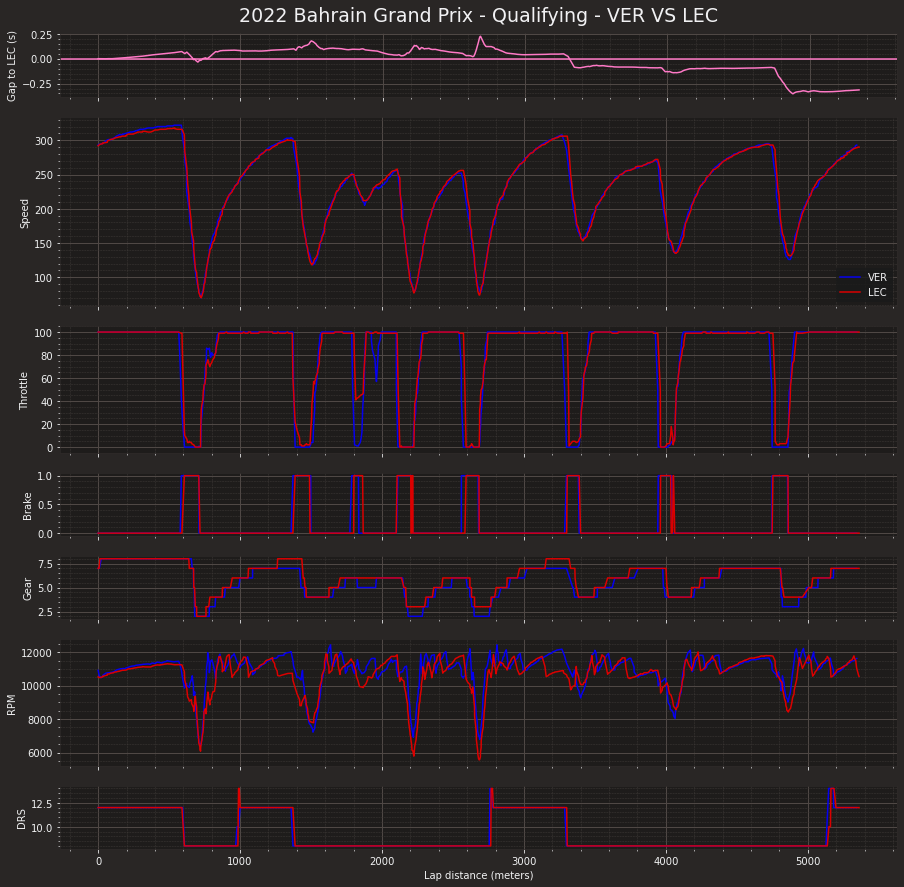

In [105]:
# Set plot size
plt.rcParams['figure.figsize'] = plot_size

# Create subplots and set sizes
fig, ax = plt.subplots(7, gridspec_kw={'height_ratios': plot_ratios})

# Plot title
# ax[0].title.set_text(plot_title)
ax[0].set_title(plot_title)

# Delta line
ax[0].plot(ref_tel['Distance'], delta_time)
ax[0].axhline(0)
ax[0].set(ylabel=f"Gap to {driver_2} (s)")

# Speed
ax[1].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Speed'], label=driver_1, color = fastf1.plotting.team_color(team_driver_1))
ax[1].plot(telemetry_driver_2['Distance'], telemetry_driver_2['Speed'], label=driver_2, color = fastf1.plotting.team_color(team_driver_2))
ax[1].set(ylabel='Speed')
ax[1].legend(loc="lower right")

# Throttle
ax[2].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Throttle'], label=driver_1, color = fastf1.plotting.team_color(team_driver_1))
ax[2].plot(telemetry_driver_2['Distance'], telemetry_driver_2['Throttle'], label=driver_2, color = fastf1.plotting.team_color(team_driver_2))
ax[2].set(ylabel='Throttle')

# Brake
ax[3].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Brake'], label=driver_1, color = fastf1.plotting.team_color(team_driver_1))
ax[3].plot(telemetry_driver_2['Distance'], telemetry_driver_2['Brake'], label=driver_2, color = fastf1.plotting.team_color(team_driver_2))
ax[3].set(ylabel='Brake')

# Gear
ax[4].plot(telemetry_driver_1['Distance'], telemetry_driver_1['nGear'], label=driver_1, color = fastf1.plotting.team_color(team_driver_1))
ax[4].plot(telemetry_driver_2['Distance'], telemetry_driver_2['nGear'], label=driver_2, color = fastf1.plotting.team_color(team_driver_2))
ax[4].set(ylabel='Gear')

# RPM
ax[5].plot(telemetry_driver_1['Distance'], telemetry_driver_1['RPM'], label=driver_1, color = fastf1.plotting.team_color(team_driver_1))
ax[5].plot(telemetry_driver_2['Distance'], telemetry_driver_2['RPM'], label=driver_2, color = fastf1.plotting.team_color(team_driver_2))
ax[5].set(ylabel='RPM')

# DRS
ax[6].plot(telemetry_driver_1['Distance'], telemetry_driver_1['DRS'], label=driver_1, color = fastf1.plotting.team_color(team_driver_1))
ax[6].plot(telemetry_driver_2['Distance'], telemetry_driver_2['DRS'], label=driver_2, color = fastf1.plotting.team_color(team_driver_2))
ax[6].set(ylabel='DRS')
ax[6].set(xlabel='Lap distance (meters)' )

# Remove x labels and tick labels for top plots and y ticks for right plots
for a in ax.flat:
    a.label_outer()

# Store figure
plt.savefig('Telemetry-PNGS/' + plot_filename, dpi=300)
plt.show()

```Fastest mini-sector by driver```

In [ ]:
# Remove formation lap from lap number
laps_driver_1['RaceLapNumber'] = laps_driver_1['LapNumber'] - 1
laps_driver_2['RaceLapNumber'] = laps_driver_2['LapNumber'] - 1

